In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# 데이터 불러오기 (~통해서 경로 지정)
car_df = pd.read_csv('data/cars.csv') # github 폴더 구조에 맞게 경로 변경(LMS실습 환경과는 경로 상이함)
brand_df = pd.read_csv('data/brand.csv') # github 폴더 구조에 맞게 경로 변경(LMS실습 환경과는 경로 상이함)

# car_df = pd.read_csv('~/data/cars.csv') # LMS실습 환경에서의 경로
# brand_df = pd.read_csv('~/data/cars.csv') # LMS실습 환경에서의 경로

In [3]:
## 데이터 살펴보기? (head 명령어)
# ~df.isna().mean() 결측치 체크
# ~df.dropna() 결측치 제거
# ~df.describe() 통계량 요약
# ~df.duplicated() 중복행 찾기
# ~df.duplicates() 중복행 제거
# ~df.replace() 
# ~df.str.split(expand=True), expand=True면 분할된 요소 별도의 열로 저장

car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [4]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [5]:
#### Q-01 자동차 데이터와 브랜드 데이터 합치기 ####
# Q. car_df와 brand_df를 합치기 위해, car_df에 brand 컬럼을 추가합니다. 
# title 값의 첫 번째 단어만 추출하여 brand 컬럼에 저장해주세요.

car_df['brand'] = car_df['title'].str.split(expand=True)[0]

In [6]:
# 잘처리 되었는지 체크?
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL


In [7]:
#### Q-02 ####
# Q. brand_df의 title 컬럼에 저장된 값들을 대문자로 변환합니다. 
brand_df['title'] = brand_df['title'].str.upper()

In [8]:
# 잘되었는지 점검?
brand_df.head()

,title,country
0,SKODA,Czech Republic
1,VAUXHALL,United Kingdom
2,HYUNDAI,South Korea
3,MINI,United Kingdom
4,FORD,United States


In [9]:
#### Q3 데이터 결합 ####
# Q. car_df의 brand 컬럼과 brand_df의 title 컬럼을 기준으로 데이터를 합칩니다.
# (힌트: car_df에서 left merge를 수행합니다.)

# [[YOUR CODE]]
# car_df를 기준, brand_df 결합 (key값 'title')
# 잘되었는지 체크?
temp = car_df.merge(brand_df, left_on='brand', right_on='title', how='left') # how에서 left/right/inner/outer 지정(기본값은 inner)

In [10]:
temp.head()

,title_x,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,title_y,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,VAUXHALL,United Kingdom


In [11]:
# car_df에 실제 병합 진행

car_df = car_df.merge(brand_df, left_on = 'brand', right_on = 'title', how='left')

In [12]:
car_df.columns

Index(['title_x', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine', 'Gearbox',
       'Doors', 'Seats', 'Emission Class', 'Service history', 'brand',
       'title_y', 'country'],
      dtype='object')

In [13]:
#### Q-04 ####
# Q. car_df에서 중복되는 컬럼 title_y를 제거합니다.
# [[YOUR CODE]]

## 중복되는 컬럼 안 만들어 져서 일부로 문제 상황 만들어 봄
# title_x, title_y 컬럼 추가 
# 기존 title 컬럼 제거

# car_df['title_x'] = car_df['title']
# car_df['title_y'] = car_df['title']
# car_df = car_df.drop(columns = ['title'])


In [14]:
# 문제 상황 재현되었는지?
# car_df.head()

In [15]:
# title_y 먼저 제거
car_df = car_df.drop(columns = ['title_y']) # title_y 제거
# title_x를 title로 변경
# df.rename(columns = {'old_nm': 'new_nm'}, inplace = True)
# 출처: https://rfriend.tistory.com/468 [R, Python 분석과 프로그래밍의 친구 (by R Friend):티스토리]

car_df = car_df.rename(columns = {'title_x': 'title'})

In [16]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,United Kingdom


In [17]:
## 문제 상황을 강제로 만들었으므로
## title 컬럼을 정렬하여 제일 처음으로 가져온다

# 모든 컬럼 리스트 가져오기
# cols = car_df.columns.tolist()

# title만 맨 앞으로, 나머지는 뒤로
# new_cols = ['title'] + [col for col in cols if col != 'title']

# 재정렬
# car_df = car_df[new_cols]

In [18]:
# 다시 데이터 확인
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,United Kingdom


In [19]:
# car_df의 복사본 bonus_df를 생성합니다.

bonus_df = car_df.copy()

In [20]:
#### 카테고리형 처리??
# 카테고리형 변수를 숫자 형태로 변환하기
# car_df의 컬럼 각각에 대해 자료형(data type)을 살펴봅니다.
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  brand              3687 non-null   object 
 14  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 460.9+ KB


In [21]:
#### Q-05 ####
# Q. Engine 컬럼의 데이터에서 L 문자를 제거하여 숫자 부분만 저장합니다.
# car_df['Engine'].value_counts() # 다 L이 들어가 있음 (기타 문자X)

# 문자 길이 점검?
# car_df['Engine'].str.len().value_counts() # 문자 길이 다르지 않음?

car_df['Engine'] = car_df['Engine'].str.replace('L','')

In [22]:
#### Q-06 ####
# Q. Emission Class 컬럼에서도 숫자 부분만 추출하여 저장합니다.
# 'Euro '제거하면 될 듯?

car_df['Emission Class'] = car_df['Emission Class'].str.replace('Euro ','')

In [23]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5,NaN,VAUXHALL,United Kingdom


In [24]:
#### Q-07 ####
# Q. to_numeric 메서드를 사용하여 Engine, Emission Class 컬럼의 자료형을 숫자 형태로 변환합니다.

car_df['Engine'] = pd.to_numeric(car_df['Engine'])
car_df['Emission Class'] = pd.to_numeric(car_df['Emission Class'])


In [25]:
# 결과 체크?
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   float64
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   float64
 12  Service history    540 non-null    object 
 13  brand              3687 non-null   object 
 14  country            3687 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 460.9+ KB


In [26]:
###### 결측치 제거
# car_df의 컬럼별로 결측치의 비율을 살펴봅시다.

car_df.isna().mean() # Previous-Owners 38.2%, Service history 85.4%

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382696
Fuel type            0.000000
Body type            0.000000
Engine               0.012205
Gearbox              0.000000
Doors                0.006781
Seats                0.009493
Emission Class       0.023596
Service history      0.853539
brand                0.000000
country              0.000000
dtype: float64

In [27]:
# car_df[~(car_df['Service history']=='Full')] # service history NAN 인 경우 3147건... 85%
#### Q-08 ####
# Q. Service history 값에 따라 그룹으로 묶어 Price의 평균을 계산합니다.

car_df.groupby('Service history')['Price'].mean() # Full만 나옴

Service history
Full    7290.209259
Name: Price, dtype: float64

In [28]:
#### Q-09 ####
# Q. Service history 컬럼의 결측치를 'Unknown' 문자열로 채웁니다.

# [[YOUR CODE]]

car_df['Service history'] = car_df['Service history'].fillna('Unknown')

In [29]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom


In [30]:
# Engine 컬럼의 결측치를 확인합니다.

# car_df[car_df['Engine'].isna()]
car_df[car_df['Engine'].isna()].shape ## 결측치 13개!

(45, 15)

In [31]:
# 결측치가 포함된 컬럼의 개수를 데이터마다 계산하여 na_values 컬럼에 저장합니다.

car_df['na_values'] = car_df.isna().sum(axis = 1) 

In [32]:
car_df.head() # NAN값의 개수를 na_values 컬럼에.. 합으로 반환했다고 이해하면 됨!

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country,na_values
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic,0
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom,0
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,HYUNDAI,South Korea,1
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom,0
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom,1


In [33]:
len(car_df[car_df['na_values'] >= 4]) # 13개 맞음 

13

In [34]:
#### Q-09 ####
# Q. na_values 컬럼의 값이 4 이상인 데이터는 제거합니다.
# [[YOUR CODE]]

car_df = car_df[car_df['na_values'] < 4] # 4이상인 데이터 제거하므로 4보다 작아야함

In [35]:
# na_values 컬럼을 제거합니다.

car_df.drop('na_values', axis = 1, inplace = True)

In [36]:
car_df.isna().mean()

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382961
Fuel type            0.000000
Body type            0.000000
Engine               0.009526
Gearbox              0.000000
Doors                0.003266
Seats                0.005988
Emission Class       0.020142
Service history      0.000000
brand                0.000000
country              0.000000
dtype: float64

In [37]:
# 다른 컬럼들의 결측치를 채우기 위해, 히스토그램을 그리고 중앙값을 계산합니다.
# Previous Owners 컬럼의 히스토그램을 그립니다.

# sns.displot(car_df['Previous Owners'])

In [38]:
# Previous Owners 컬럼의 중앙값을 계산합니다.

# car_df['Previous Owners'].median()

In [39]:
# sns.displot(car_df['Engine'])

In [40]:
# car_df['Engine'].mean()

In [41]:
# car_df['Engine'].median()

In [42]:
# sns.displot(car_df['Doors'])

In [43]:
# car_df['Doors'].median()

In [44]:
# sns.displot(car_df['Seats'])

In [45]:
#### Q-10 ####
## Q. 해당 컬럼들의 중앙값으로 결측치를 채웁니다.
# Previous Owners, Engine, Doors, Seats, Emission Class
# df['col1'] = df['col1'].fillna(df['col1'].median())

car_df['Previous Owners'] = car_df['Previous Owners'].fillna(car_df['Previous Owners'].median())
car_df['Engine'] = car_df['Engine'].fillna(car_df['Engine'].median())
car_df['Doors'] = car_df['Doors'].fillna(car_df['Doors'].median())
car_df['Seats'] = car_df['Seats'].fillna(car_df['Seats'].median())
car_df['Emission Class']= car_df['Emission Class'].fillna(car_df['Emission Class'].median())

In [46]:
#### 참고

# cols = ['Previous Owners', 'Engine', 'Doors', 'Seats', 'Emission Class']

#for col in cols:
#    car_df[col] = car_df[col].fillna(car_df[col].median())

In [47]:
#### 이상치 제거 ####

# Price 컬럼의 값들을 정렬하여 보여줍니다.
# car_df['Price'].sort_values()

# Mileage(miles) 컬럼의 값들을 정렬하여 보여줍니다.
# car_df['Mileage(miles)'].sort_values()

In [48]:
#### Q-11 ####
# Q. Mileage(miles) 컬럼의 값이 1000 이하인 데이터를 제거합니다.

# [[YOUR CODE]]

car_df = car_df[car_df['Mileage(miles)'] > 1000 ] # 1000보다 큰 것만 살린다!


In [49]:
# Registration_Year 컬럼의 값이 2025 미만인 데이터만 추출합니다.

car_df = car_df[car_df['Registration_Year'] < 2025]

In [50]:
# car_df['Previous Owners'].sort_values()
# car_df[car_df['Previous Owners'] == 9]

In [51]:
#### Q-12 ####
# Q. brand 컬럼의 값에 따라 데이터를 그룹화하여 Price의 평균, 표준편차를 계산합니다.
# (agg() 함수를 사용해주세요.)

# [[YOUR CODE]]

car_df.groupby('brand')['Price'].agg(['mean','std']).head()

,mean,std
brand,,
ABARTH,11216.333333,6039.482621
ALFA,3197.388889,2495.694814
AUDI,7719.527397,4866.621560
BMW,8325.981343,6036.639654
CHEVROLET,3331.642857,1306.453191


In [52]:
#### Q-13 ####
# Q. brand와 Fuel type 컬럼을 기준으로 Price 값의 피벗 테이블을 생성합니다.
# [[YOUR CODE]]
# pd.pivot_table(salary_df, index = 'Country', columns = 'Gender', values = 'Years of Experience')

car_df.pivot_table(index = 'brand', columns ='Fuel type', values = 'Price').head()

Fuel type,Diesel,Diesel Hybrid,Electric,Petrol,Petrol Hybrid,Petrol Plug-in Hybrid
brand,,,,,,
ABARTH,NaN,NaN,NaN,11216.333333,NaN,NaN
ALFA,4214.666667,NaN,NaN,2688.750000,NaN,NaN
AUDI,8731.301205,NaN,NaN,6386.555556,NaN,NaN
BMW,7342.022222,23220.0,NaN,7058.486239,NaN,19460.652174
CHEVROLET,5249.500000,NaN,NaN,3012.000000,NaN,NaN


In [53]:
# car_df.head()

<AxesSubplot:xlabel='Previous Owners', ylabel='Price'>

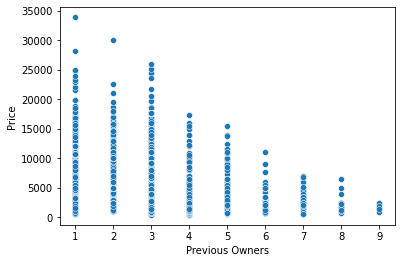

In [54]:
# Previous Owners와 Price 사이의 scatter plot을 그립니다.

sns.scatterplot( x= car_df['Previous Owners'], y = car_df['Price'])

<AxesSubplot:xlabel='Registration_Year', ylabel='Price'>

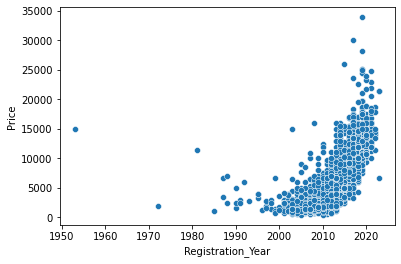

In [55]:
# Registration_Year와 Price 사이의 scatter plot을 그립니다.

sns.scatterplot( x= car_df['Registration_Year'], y = car_df['Price'])

<AxesSubplot:xlabel='Registration_Year', ylabel='Price'>

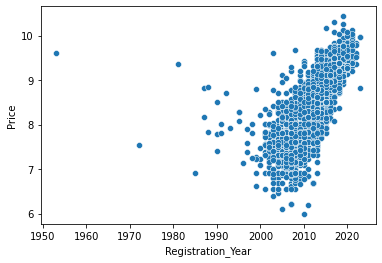

In [56]:
sns.scatterplot( x= car_df['Registration_Year'], y = np.log(car_df['Price']))

In [57]:
#### Scaler 활용하기
# car_df.drop('title', axis = 1, inplace = True) # 'title컬럼 제거'
# 자동차의 브랜드별로 데이터의 개수를 계산합니다.
car_df['brand'].value_counts().head()

VAUXHALL      549
FORD          409
VOLKSWAGEN    271
BMW           268
PEUGEOT       245
Name: brand, dtype: int64

In [58]:
# 자동차의 브랜드별로 평균 가격을 계산합니다.

car_df.groupby('brand')['Price'].mean().head()

brand
ABARTH       11216.333333
ALFA          3197.388889
AUDI          7719.527397
BMW           8325.981343
CHEVROLET     3331.642857
Name: Price, dtype: float64

In [59]:
#### Q-14 ####
#Q. 자동차의 브랜드별로 데이터 개수와 평균 가격을 출력합니다. 
# (위에서 출력했던 데이터 두 가지를 join 메서드로 합쳐주세요.)

# [[YOUR CODE]]
dd1 = car_df['brand'].value_counts()
dd2 = car_df.groupby('brand')['Price'].mean()

In [60]:
# 두 결과를 join (인덱스 기준 merge)

result = dd1.to_frame(name='Count').join(dd2.to_frame(name='Average Price'))

In [61]:
result.head()

,Count,Average Price
VAUXHALL,549,4658.207650
FORD,409,4859.144254
VOLKSWAGEN,271,6513.217712
BMW,268,8325.981343
PEUGEOT,245,5463.955102


In [62]:
car_df.drop('title', axis = 1, inplace = True)

In [63]:
# 범주형 컬럼들에 원-핫 인코딩을 적용합니다.

car_df = pd.get_dummies(car_df, drop_first = True)

In [64]:
# car_df.shape # 3669 행 맞음

In [65]:
#### Q-15
### Q. Robust Scaler를 rs 변수로 정의해줍니다.
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [66]:
#### Q-16 
# Q. robust scaling을 적용한 데이터프레임을 car_df 변수에 다시 저장합니다.
# [[YOUR CODE]]
# robust-scaling도 해보자
# rs.fit(salary_df)
# rs.transform(salary_df)
# rs_df = pd.DataFrame(rs.transform(salary_df), columns = salary_df.columns)

rs.fit(car_df)
car_df_scaled = pd.DataFrame(rs.transform(car_df)) # 뒤에보니 PCA 할거라서 컬럼명 지정 필요없을 듯?

In [67]:
car_df.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Fuel type_Diesel Hybrid,Fuel type_Electric,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
0,6900,70189,2016,3.0,1.4,5.0,5.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1495,88585,2008,4.0,1.2,3.0,5.0,4.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,949,137000,2011,3.0,1.4,5.0,5.0,5.0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2395,96731,2010,5.0,1.4,3.0,4.0,4.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1000,85000,2013,3.0,1.3,5.0,5.0,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [68]:
car_df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,0.526794,-0.213208,0.571429,0.0,-0.333333,0.0,0.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.455041,0.186566,-0.571429,1.0,-0.666667,-1.0,0.0,-0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.554223,1.238700,-0.142857,0.0,-0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.291553,0.363591,-0.285714,2.0,-0.333333,-1.0,-1.0,-0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.544959,0.108658,0.142857,0.0,-0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [69]:
#### PCA?? ####
#### Q-17

from sklearn.decomposition import PCA

# Q. 주성분이 5개인 PCA 모델을 정의합니다.
# [[YOUR CODE]]

pca = PCA(n_components= 5) # 숫자 지정

In [70]:
pca

PCA(n_components=5)

In [71]:
#### Q-18
# Q. car_df 데이터에 PCA를 적용합니다.

# [[YOUR CODE]]

pca_df = pca.fit_transform(car_df_scaled)
# pca_df를 data_frame으로 변환해 줘야 함 (여기서 실수함!)
pca_df = pd.DataFrame(pca_df, columns = ['PC1','PC2','PC3','PC4','PC5'])

In [72]:
pca_df

,PC1,PC2,PC3,PC4,PC5
0,-0.514980,-0.422637,-0.415003,0.646677,0.287282
1,1.312384,-1.217170,0.349554,-0.268355,-0.159760
2,0.812080,-0.223882,1.006030,0.654409,0.663230
3,1.961983,-1.312642,-0.517619,-0.709750,0.546533
4,0.267575,-0.653314,0.514638,0.555964,-0.125743
...,...,...,...,...,...
3664,1.427772,-0.807223,0.187850,0.093612,-0.565526
3665,0.435272,1.081559,-0.283845,-0.141186,0.549209
3666,0.757281,1.455642,-0.085260,0.230942,0.864441
3667,1.658730,1.682128,1.001384,0.811345,0.409601


In [73]:
# Q. 원본 데이터 대비 PCA 데이터의 분산(explained variance) 비율을 계산합니다.

# [[YOUR CODE]]
(pca.explained_variance_ratio_).sum()

0.6402265237362028

In [74]:
# car_df_scaled.head()

In [75]:
# 주성분의 개수가 2~10개일 때 explained variance ratio를 각각 계산합니다.

for i in range(2, 11):
    pca = PCA(i)
    pca.fit(car_df_scaled)
    print(i, round(pca.explained_variance_ratio_.sum(), 2))

2 0.41
3 0.52
4 0.59
5 0.64
6 0.68
7 0.71
8 0.74
9 0.77
10 0.79


In [76]:
#### Q-19 
# 주성분? 7개일때? PC1~PC7출력?

pca = PCA(n_components=7)
pca_components = pca.fit_transform(car_df_scaled)

# 결과를 DataFrame으로 변환 + 컬럼명 지정
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(7)])

In [77]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.514980,-0.422637,-0.415003,0.646676,0.287282,0.032616,-0.017711
1,1.312384,-1.217170,0.349554,-0.268355,-0.159764,0.998403,0.070125
2,0.812080,-0.223882,1.006030,0.654407,0.663231,0.051126,0.084576
3,1.961983,-1.312642,-0.517619,-0.709751,0.546530,0.644093,0.133204
4,0.267575,-0.653314,0.514638,0.555965,-0.125742,1.161916,0.179221


In [78]:
#### Q-21 ####
# Q. bonus_df의 각 컬럼들에 대해 상관 계수를 출력합니다.

# [[YOUR CODE]]

bonus_df.corr()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
Price,1.000000,-0.500358,0.722971,-0.479424,0.113335,-0.027393
Mileage(miles),-0.500358,1.000000,-0.410781,0.316160,-0.037024,0.095271
Registration_Year,0.722971,-0.410781,1.000000,-0.501045,0.219365,0.037166
Previous Owners,-0.479424,0.316160,-0.501045,1.000000,-0.153262,-0.029338
Doors,0.113335,-0.037024,0.219365,-0.153262,1.000000,0.497160
Seats,-0.027393,0.095271,0.037166,-0.029338,0.497160,1.000000


In [79]:
#### Q-20 ####
# Q. 국가별로 브랜드의 개수를 계산해봅시다. 
# (이전에 복사해둔 bonus_df를 사용합니다.)

# [[YOUR CODE]]

bonus_df.groupby('country')['brand'].nunique()


country
Czech Republic     1
France             4
Germany            6
Italy              4
Japan             11
Malaysia           1
Romania            1
South Korea        4
Spain              1
Sweden             2
United Kingdom     8
United States      5
Name: brand, dtype: int64